## The assignment is to plot a Logistic Regression for the csv file IPL2016.csv. <br>
### It is a file containing the strike rate of AB De Villiers and Virat Kohli collectively in each match in IPL 2016, with if RCB won or lost the match. Won has been represented with 1, and Lost with 0(File has been cleaned, cause that is not the purpose of the assignment). 
### You're assignment is to find a function, such that if we input the collective strike rate of ABD and VK, we can get an accurate probability of RCB winning the match.

### This is a Logistic Regression problem. <br>
### We have basically $Y_i \stackrel{i.i.d.} \sim Bern(\frac{e^{\beta^T \vec{X_i}}}{1 + e^{\beta^T \vec{X_i}}})$

Reminder : Don't forget the Intercept Coefficient.

Hint : Maximising a Function is the same as minimising the negative Function.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

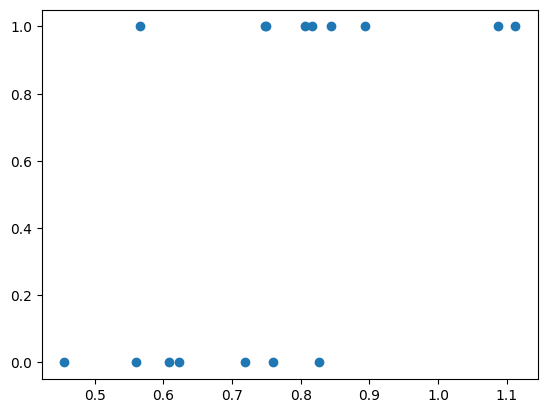

In [4]:
df=pd.read_csv("IPL2016.csv")
X=df["overall_sr"]/200
Y=df["won"]
plt.scatter(X,Y)

In [5]:
def sigmoid(x):
    return 1/(1+ np.exp(-x))

def square_loss(y_pred,y_test):
    return np.mean((y_pred - y_test)**2)

def dW(X, y, y_pred):
    m = y.shape[0]
    derivative_W = -np.sum(X * (y-y_pred))/m
    return derivative_W


def db(y, y_pred):
    m = y.shape[0]
    derivative_b = -np.sum(y-y_pred)/m
    return derivative_b


def CostFunction(y, y_pred):
    m = y.shape[0]
    cost = -np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))/m
    return cost

def GradientDescent(X, y, W, b, epochs, learningRate):
    costHistory = []
    for i in range(epochs):
        W_curr, b_curr = W, b
        y_pred = sigmoid(W_curr*X + b_curr)
        W = W - learningRate * dW(X, y, y_pred)
        b = b - learningRate * db(y, y_pred)
        if i%100 == 0:
            costHistory.append(CostFunction(y, y_pred))
    return W, b ,costHistory

In [8]:
ALPHA = 0.1
epochs = 15000

W = np.random.randn()
b = 0
costHistory = []


W, b, costHistory = GradientDescent(X, Y, W, b, epochs, ALPHA)

In [9]:
W, b

(9.646665196304937, -6.907441285262937)

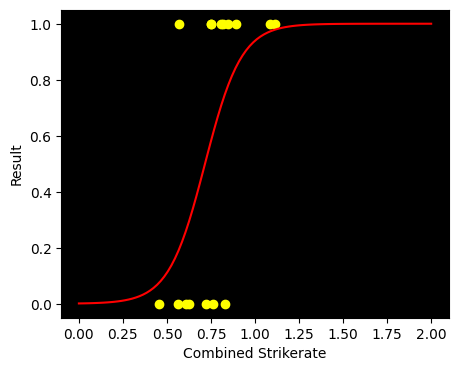

In [12]:
figure = plt.figure(figsize=(5, 4))
ax = figure.add_subplot(111, facecolor='black')

scatter = ax.scatter(X, Y, c='yellow')

ax.set_xlabel('Combined Strikerate')
ax.set_ylabel('Result')

X_axis = np.linspace(0, 2, 100)
plot_sigmoid = ax.plot(X_axis, sigmoid(X_axis*W+b), c='red')

plt.show()

In [14]:
m = Y.shape[0]
correctPredictions = 0
for i, strikeRate in enumerate(X):
    if W * strikeRate + b >= 0.5:
        prediction = 1
    else:
        prediction = 0
    correctPredictions += Y[i]==prediction

print(f" Accuracy = {(correctPredictions / m) * 100} %")

 Accuracy = 75.0 %


In [16]:
def WinProbabilty(StrikeRate):
    StrikeRate = StrikeRate / 200 
    global W, b
    return sigmoid(W*StrikeRate+b)

WinProbabilty(120)

0.24611477041530871